<a href="https://colab.research.google.com/github/sherry-tang-97/house_price_prediction/blob/main/house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
import pandas as pd
%cd drive/MyDrive/house_data/

[Errno 2] No such file or directory: 'drive/MyDrive/house_data/'
/content/drive/MyDrive/house_data


In [75]:
import numpy as np
import seaborn as sns

In [76]:
train = pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [77]:
#clean data
all=pd.concat([train, test], axis=0)

In [78]:
all.isna().sum()[all.isna().sum()!=0].sort_values(ascending=False)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
KitchenQual        1
TotalBsmtSF        1
BsmtUnfSF          1
GarageCars         1
GarageArea         1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
Electrical         1
dtype: int64

In [79]:
all.PoolQC=all.PoolQC.fillna(value='None')

In [80]:
levs=all.PoolQC.unique().tolist()
all.PoolQC=all.PoolQC.replace(levs, value=[0,5,2,4])
#all.query('PoolQC == 0 & PoolArea >0')
all.loc[all["Id"] == 2421, "PoolQC"] = 3


In [81]:
all.loc[all["Id"] == 2504, "PoolQC"] = 3
all.loc[all["Id"] == 2600, "PoolQC"] = 3


In [82]:
all.MiscFeature=all.MiscFeature.fillna(value='None')
all.Alley=all.Alley.fillna(value='None')
all.Fence=all.Fence.fillna(value='None')
#all.FireplaceQu.isna().sum()
#all.Fireplaces.value_counts()
all.FireplaceQu=all.FireplaceQu.fillna(value='None')
all.LotFrontage=all.LotFrontage.fillna(value=all.LotFrontage.median())

In [83]:
#drop garage year built later as this is very similar to year built
garages=['Id', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']
all[all.GarageArea.isna()][garages]
#seems that id 2577 is misrecorded and it actually does not have a garage

,Id,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
1116,2577,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
all.loc[all["Id"] == 2577, "GarageType"] = 'None'
all.loc[all["Id"] == 2577, "GarageYrBlt"] = 'None'
all.loc[all["Id"] == 2577, "GarageFinish"] = 'None'
all.loc[all["Id"] == 2577, "GarageCars"] = 0
all.loc[all["Id"] == 2577, "GarageArea"] = 0
all.loc[all["Id"] == 2577, "GarageQual"] = 'None'
all.loc[all["Id"] == 2577, "GarageCond"] = 'None'


In [85]:
(all.GarageArea==0).sum()
all.loc[all["GarageArea"] == 0, "GarageType"] = 'None'
all.loc[all["GarageArea"] == 0, "GarageYrBlt"] = 'None'
all.loc[all["GarageArea"] == 0, "GarageFinish"] = 'None'
all.loc[all["GarageArea"] == 0, "GarageQual"] = 'None'
all.loc[all["GarageArea"] == 0, "GarageCond"] = 'None'


In [86]:
all.GarageCond.value_counts()

TA      2654
None     158
Fa        74
Gd        15
Po        14
Ex         3
Name: GarageCond, dtype: int64

In [87]:
all.loc[all["Id"] == 2127, "GarageFinish"] = 'Unf'
all.loc[all["Id"] == 2127, "GarageQual"] = 'TA'
all.loc[all["Id"] == 2127, "GarageCond"] = 'TA'

In [88]:
#basements
basements=['Id', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 
           'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
all[basements].head()
a=all['BsmtFinSF1'] + all['BsmtFinSF2'] + all['BsmtUnfSF']
b=all['TotalBsmtSF']
c=all['Id']
df=pd.concat([c, a, b], axis=1)
df.columns=['Id', 'add', 'TotalBsmtSF']
df.query('add!=TotalBsmtSF')
# perfect collinearity exists, consider dropping one variable

,Id,add,TotalBsmtSF
660,2121,NaN,NaN


In [89]:
#all[all.TotalBsmtSF.isna()][basements]
#2121 does not seem to have basements
replace_with_none=['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
replace_with_zero=['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
all.loc[all["Id"] == 2121, replace_with_none] = 'None'
all.loc[all["Id"] == 2121, replace_with_zero] = 0
all.loc[all["TotalBsmtSF"] == 0, replace_with_none] = 'None'
all.loc[all["TotalBsmtSF"] == 0, replace_with_zero] = 0
#all[all.BsmtCond.isna()][basements]
all.loc[all.BsmtCond.isna(), "BsmtCond"] = 'TA'
all[all.Id==2186][basements]
all.loc[all.BsmtExposure.isna(), "BsmtExposure"] = 'No'
all.loc[all.BsmtQual.isna(), "BsmtQual"] = 'TA'
all[all.BsmtFinType2.isna()][basements]
all.loc[all.BsmtFinType2.isna(), "BsmtFinType2"] = 'GLQ'


In [90]:
all.loc[all.MasVnrArea.isna(), "MasVnrArea"] = 0
all.loc[all.MasVnrArea==0, "MasVnrType"] = 'None'
all.loc[all.MasVnrType.isna(), "MasVnrType"] = 'BrkFace'



In [91]:
all.loc[all.MSZoning.isna(), "MSZoning"] = 'RL'
all.loc[all.Functional.isna(), "Functional"] = 'Typ'
all.loc[all.Utilities.isna(), "Utilities"] = 'AllPub'
all.loc[all.KitchenQual.isna(), "KitchenQual"] = 'TA'
all.loc[all.Exterior1st.isna(), "Exterior1st"] = 'VinylSd'
all.loc[all.Exterior2nd.isna(), "Exterior2nd"] = 'VinylSd'
all.loc[all.SaleType.isna(), "SaleType"] = 'WD'
all.loc[all.Electrical.isna(), "Electrical"] = 'SBrkr'


In [92]:
#numeric, categorical, ordinal
#find ordinals and label encode 

all.LotShape=all.LotShape.replace(['Reg', 'IR1', 'IR2', 'IR3'], value=[3,2,1,0])
all.LandSlope=all.LandSlope.replace(['Gtl', 'Mod', 'Sev'], value=[2,1,0])
all.ExterQual=all.ExterQual.replace(['Gd', 'TA', 'Ex', 'Fa'], value=[3,2,4,1])
all.ExterCond=all.ExterCond.replace(['TA', 'Gd', 'Fa', 'Po', 'Ex'], value=[2,3,1,0,4])

grades=['Ex','Gd','TA','Fa','Po','None']
scores=[5,4,3,2,1,0]

all.BsmtQual=all.BsmtQual.replace(grades, value=scores)
all.BsmtCond=all.BsmtCond.replace(grades, value=scores)

exps=['Gd','Av','Mn','No','None']
exps_score=[4,3,2,1,0]
all.BsmtExposure=all.BsmtExposure.replace(exps, value=exps_score)

ft=['GLQ','ALQ','BLQ','Rec','LwQ','Unf','None']
fts=[6,5,4,3,2,1,0]
all.BsmtFinType1=all.BsmtFinType1.replace(ft, value=fts)
all.BsmtFinType2=all.BsmtFinType2.replace(ft, value=fts)

grades_wo=['Ex','Gd','TA','Fa','Po']
scores_wo=[4,3,2,1,0]
all.HeatingQC=all.HeatingQC.replace(grades_wo, value=scores_wo)
all.KitchenQual=all.KitchenQual.replace(grades_wo, value=scores_wo)

f=['Typ','Min1','Min2','Mod','Maj1','Maj2','Sev','Sal']
fs=[7,6,5,4,3,2,1,0]
all.Functional=all.Functional.replace(f, value=fs)
all.FireplaceQu=all.FireplaceQu.replace(grades, value=scores)

gf=['Fin','RFn','Unf','None']   
gfs=[3,2,1,0] 
all.GarageFinish=all.GarageFinish.replace(gf, value=gfs)
all.GarageQual=all.GarageQual.replace(grades, value=scores)
all.GarageCond=all.GarageCond.replace(grades, value=scores)
p=['Y','P','N']
ps=[2,1,0]
all.PavedDrive=all.PavedDrive.replace(p, value=ps)
pool=['Ex','Gd','TA','Fa','None']
pools=[4,3,2,1,0]
all.PoolQC=all.PoolQC.replace(pool, value=pools)

fence=['GdPrv','MnPrv','GdWo','MnWw','None']
fences=[4,3,2,1,0]
all.Fence=all.Fence.replace(fence, value=fences)

ordinals=['LotShape', 'LandSlope', 'ExterQual','ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish',
'GarageQual', 'GarageCond', 'PavedDrive','PoolQC','Fence']

numerics=all.dtypes[all.dtypes!='object'].index.tolist()
numerics=[ele for ele in numerics if ele not in ordinals]
all_vs=all.dtypes.index.tolist()
cats=[ele for ele in all_vs if ele not in (ordinals+numerics)]
numerics=[ele for ele in numerics if ele not in ['Id', 'SalePrice']]
#regroup neibourhood, Exterior1st, Exterior2nd, 

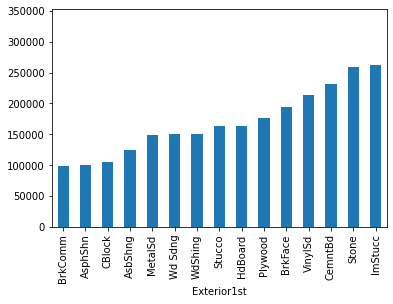

In [93]:
pd.set_option("display.max_columns", None)
all[cats].describe()
d=all.groupby(['Neighborhood'])['SalePrice'].mean().sort_values()
d.plot(kind='bar')
low_neibs=['MeadowV', 'IDOTRR', 'BrDale']
high_neibs=['StoneBr', 'NridgHt', 'NoRidge']
all_neibs=all.Neighborhood.unique().tolist()
med_neibs=[ele for ele in all_neibs if ele not in (low_neibs+high_neibs)]


d_e1=all.groupby(['Exterior1st'])['SalePrice'].mean().sort_values()
d_e1.plot(kind='bar')

all_e1=all.Exterior1st.unique().tolist()
high_e1=['VinylSd', 'CemntBd', 'Stone', 'ImStucc']
low_e1=['BrkComm', 'AsphShn', 'CBlock']
med_e1=[ele for ele in all_e1 if ele not in (low_e1+high_e1)]

d_e2=all.groupby(['Exterior2nd'])['SalePrice'].mean().sort_values()

all_e2=all.Exterior2nd.unique().tolist()
high_e2=['CmentBd', 'ImStucc','Other' ]
low_e2=['CBlock', 'AsbShng', 'Brk Cmn']
med_e2=[ele for ele in all_e2 if ele not in (low_e2+high_e2)]


In [95]:
all.Neighborhood=all.Neighborhood.replace(high_neibs, 'High').replace(low_neibs, 'Low').replace(med_neibs, 'Middle')
all.Exterior1st=all.Exterior1st.replace(high_e1, 'High').replace(low_e1, 'Low').replace(med_e1, 'Middle')
all.Exterior2nd=all.Exterior2nd.replace(high_e2, 'High').replace(low_e2, 'Low').replace(med_e2, 'Middle')

In [96]:
# make MSSubClass and month categorical instead
numerics=[ele for ele in numerics if ele not in ['MoSold','MSSubClass']]
cats=cats+['MoSold','MSSubClass']

In [123]:
#drop some variable
cats=[ele for ele in cats if ele not in 'GarageYrBlt']
numerics=[ele for ele in numerics if ele not in 'BsmtUnfSF']

In [138]:
#one hot encode categoricals
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')
encoder.fit(all[cats].to_numpy())
one_hots=encoder.transform(all[cats].to_numpy())
#all[cats].nunique(axis=0).sum()-26
dm_names=["dm_" + str(i+1) for i in range(126)]
df_cats=pd.DataFrame(one_hots, columns=dm_names)

In [226]:
combine=pd.concat([all[numerics].reset_index(drop=True), all[ordinals].reset_index(drop=True), df_cats], axis=1)
combine=combine.merge(all['SalePrice'].reset_index(drop=True), left_index=True, right_index=True)
test1=combine[combine.SalePrice.isna()]
train1=combine[~combine.SalePrice.isna()]
train1x=train1.loc[:, train1.columns!='SalePrice']
train1y=train1['SalePrice']
test1x=test1.loc[:, test1.columns!='SalePrice']

In [291]:
import xgboost as xgb
model = xgb.XGBRegressor(n_estimators=100, max_depth=4, eta=0.05)
model.fit(train1x, train1y)

[08:53:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(eta=0.05, max_depth=4)

In [292]:
pred_train=model.predict(train1x)
ans=train1y.to_numpy()
data=pd.DataFrame({'ans':ans, 'pred':pred_train})

a=(np.log(data.ans)-np.log(data.pred))**2
a=a.mean()
a**0.5

0.07719956534071257

In [293]:
pred_xgb=model.predict(test1x)
ids=test['Id'].to_numpy()
result=pd.DataFrame({'Id':ids, 'SalePrice':pred_xgb})
result.to_csv('house.csv')

In [255]:
from sklearn.linear_model import ElasticNet
enet=ElasticNet(alpha=5, l1_ratio=1)
enet.fit(train1x, train1y)

ElasticNet(alpha=5, l1_ratio=1)

In [256]:
pred_train=enet.predict(train1x)
ans=train1y.to_numpy()
data=pd.DataFrame({'ans':ans, 'pred':pred_train})

a=(np.log(data.ans)-np.log(data.pred))**2
a=a.mean()
a**0.5

0.13770109615716006

In [248]:
pred=enet.predict(test1x)
ids=test['Id'].to_numpy()
result=pd.DataFrame({'Id':ids, 'SalePrice':pred})
result.to_csv('house.csv')

In [296]:
#fix skewness of response
log_train1y=np.log(train1y)
enet=ElasticNet(alpha=0.01, l1_ratio=0)
enet.fit(train1x, log_train1y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.157e+01, tolerance: 2.328e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


ElasticNet(alpha=0.01, l1_ratio=0)

In [297]:
pred_train=enet.predict(train1x)
pred_train=np.exp(pred_train)
ans=train1y.to_numpy()
data=pd.DataFrame({'ans':ans, 'pred':pred_train})

a=(np.log(data.ans)-np.log(data.pred))**2
a=a.mean()
a**0.5

0.12145534288095655

In [298]:
pred_enet=enet.predict(test1x)
pred_enet=np.exp(pred_enet)
ids=test['Id'].to_numpy()
result=pd.DataFrame({'Id':ids, 'SalePrice':pred_enet})
result.to_csv('house.csv')

In [302]:
pred=(pred_xgb+2*pred_enet)/3
ids=test['Id'].to_numpy()
result=pd.DataFrame({'Id':ids, 'SalePrice':pred})
result.to_csv('house.csv')

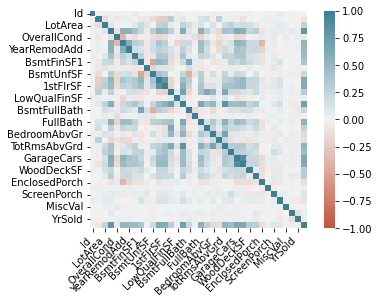

In [ ]:
#exploratory data analysis


corr=clean_train.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);



In [ ]:
check=(corr>0.7).sum()[(corr>0.7).sum()!=1].index.values.tolist()

In [ ]:
#TotalBsmtSF, 1stFlrSF
#TotRmsAbvGrd, GrLivArea
#GarageCars, GarageArea

#Above variable pairs should remove one from each due to high correlation
eda_train=clean_train.drop(columns=['TotalBsmtSF', 'TotRmsAbvGrd', 'GarageCars'])

In [ ]:
from pickle import TRUE
important_num=eda_train.corr()['SalePrice']
important_num.sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageArea       0.623431
1stFlrSF         0.605852
FullBath         0.560664
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475241
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

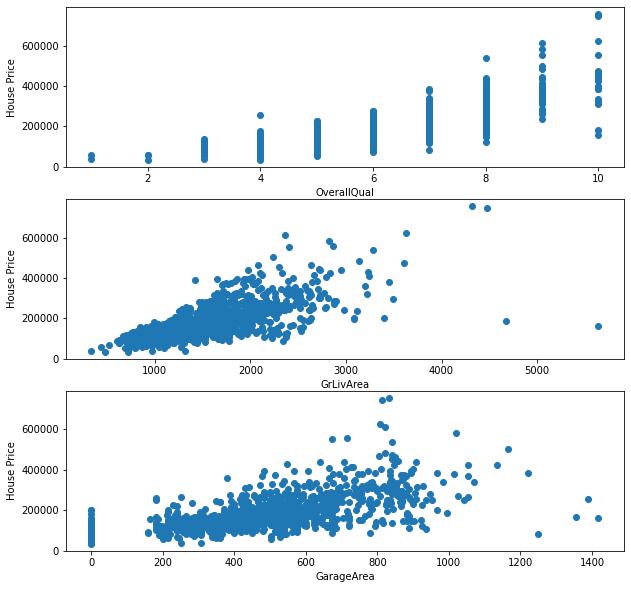

In [ ]:
#plot some scatter plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, figsize=(10, 10))
ax[0].scatter(x = eda_train['OverallQual'], y = eda_train['SalePrice'])
ax[0].set_xlabel("OverallQual")
ax[0].set_ylabel("House Price")

ax[1].scatter(x = eda_train['GrLivArea'], y = eda_train['SalePrice'])
ax[1].set_xlabel("GrLivArea")
ax[1].set_ylabel("House Price")

ax[2].scatter(x = eda_train['GarageArea'], y = eda_train['SalePrice'])
ax[2].set_xlabel("GarageArea")
ax[2].set_ylabel("House Price")

plt.show()


In [ ]:
abs(eda_train.corr(method='spearman')['SalePrice']).sort_values(ascending=False)        

SalePrice        1.000000
OverallQual      0.809829
GrLivArea        0.731310
YearBuilt        0.652682
GarageArea       0.649379
FullBath         0.635957
1stFlrSF         0.575408
YearRemodAdd     0.571159
Fireplaces       0.519247
OpenPorchSF      0.477561
LotArea          0.456461
MasVnrArea       0.422884
WoodDeckSF       0.353802
HalfBath         0.343008
BsmtFinSF1       0.301871
2ndFlrSF         0.293598
BedroomAbvGr     0.234907
BsmtFullBath     0.225125
EnclosedPorch    0.218394
BsmtUnfSF        0.185197
KitchenAbvGr     0.164826
OverallCond      0.129325
ScreenPorch      0.100070
MoSold           0.069432
LowQualFinSF     0.067719
3SsnPorch        0.065440
MiscVal          0.062727
PoolArea         0.058453
BsmtFinSF2       0.038806
YrSold           0.029899
Id               0.018546
BsmtHalfBath     0.012189
MSSubClass       0.007192
Name: SalePrice, dtype: float64

Text(0, 0.5, 'House Price')

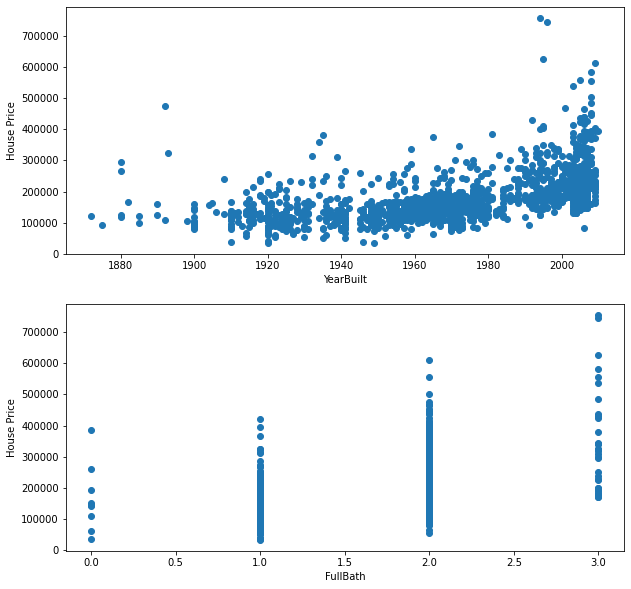

In [ ]:
fig, ax = plt.subplots(2, figsize=(10, 10))
ax[0].scatter(x = eda_train['YearBuilt'], y = eda_train['SalePrice'])
ax[0].set_xlabel("YearBuilt")
ax[0].set_ylabel("House Price")

ax[1].scatter(x = eda_train['FullBath'], y = eda_train['SalePrice'])
ax[1].set_xlabel("FullBath")
ax[1].set_ylabel("House Price")


In [ ]:
categoricals=eda_train.dtypes[eda_train.dtypes=='object'].index.values.tolist()

In [ ]:
#Handle categoricals that contain too many levels
pd.set_option('display.max_columns', None)

eda_train[categoricals].describe()
#Neighborhood, Exterior1st, Exterior2nd have too many levels

neibs=eda_train.Neighborhood.value_counts()

tokeep=neibs[neibs>=100].index.values.tolist()
toreplace=neibs[neibs<100].index.values.tolist()

eda_train.Neighborhood=eda_train.Neighborhood.replace(toreplace, value='others')

eda_train.head()

eda_train.Neighborhood.value_counts()


e1=eda_train.Exterior1st.value_counts()
toreplace_e1=e1[e1<100].index.values.tolist()
eda_train.Exterior1st=eda_train.Exterior1st.replace(toreplace_e1, value='others')

e2=eda_train.Exterior2nd.value_counts()
toreplace_e2=e2[e2<100].index.values.tolist()
eda_train.Exterior2nd=eda_train.Exterior2nd.replace(toreplace_e2, value='others')



In [ ]:
eda_train[categoricals].describe()


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,4,4,2,5,3,5,9,8,5,8,6,8,6,6,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,others,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,872,1260,1445,1220,726,1141,1434,515,504,872,906,1282,647,686,1348,991,467,1294,1428,741,1365,1335,735,1360,1340,1267,1198


In [ ]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

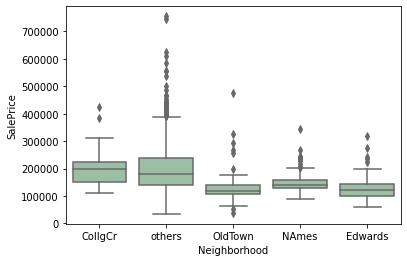

In [ ]:
#Utilities,Neighborhood,HeatingQC,Functional, Exterior1st, LotShape, Street, HouseStyle
#investigate the above categoricals

eda_train.Utilities.value_counts()
#very unbalnced


ax = sns.boxplot(x='Neighborhood', y='SalePrice', data=eda_train, color='#99c2a2')
#HeatingQC, HouseStyle, 


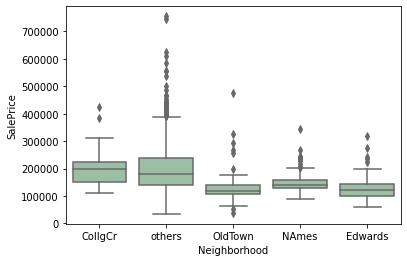

In [ ]:
#Utilities,Neighborhood,HeatingQC,Functional, Exterior1st, LotShape, Street, HouseStyle
#investigate the above categoricals

eda_train.Utilities.value_counts()
#very unbalnced


ax = sns.boxplot(x='Neighborhood', y='SalePrice', data=eda_train, color='#99c2a2')
#HeatingQC, HouseStyle, Neighborhood


In [ ]:
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#try 1

#process categoricals
test = pd.read_csv('test.csv')


train_cat=eda_train[['HeatingQC', 'HouseStyle', 'Neighborhood']]
test_cat=test[['HeatingQC', 'HouseStyle', 'Neighborhood']]

all=test_cat.Neighborhood.value_counts().index.values.tolist()
toreplace=[ele for ele in all if ele not in tokeep]
test_cat.Neighborhood=test_cat.Neighborhood.replace(toreplace, value='others')

all_cat=pd.concat([train_cat, test_cat], axis=0)


encoder = OneHotEncoder(sparse=False, drop='first')
encoder.fit(all_cat.to_numpy())

train_cat=encoder.transform(train_cat.to_numpy())
test_cat=encoder.transform(test_cat.to_numpy())

HeatingQC_levels=encoder.categories_[0].tolist()[1:]
HeatingQC_labels=['HeatingQC_' + element for element in HeatingQC_levels]

HouseStyle_levels=encoder.categories_[1].tolist()[1:]
HouseStyle_labels=['HouseStyle_' + element for element in HouseStyle_levels]

Neighborhood_levels=encoder.categories_[2].tolist()[1:]
Neighborhood_labels=['Neighborhood_' + element for element in Neighborhood_levels]

all_labels=HeatingQC_labels+HouseStyle_labels+Neighborhood_labels

train_cat=pd.DataFrame(train_cat, columns = all_labels)
test_cat=pd.DataFrame(test_cat, columns = all_labels)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
#process nums

train_num=eda_train[['OverallQual', 'GrLivArea', 'GarageArea', 'YearBuilt', 'FullBath']]
test_num=test[['OverallQual', 'GrLivArea', 'GarageArea', 'YearBuilt', 'FullBath']]
test_num=test_num.fillna(np.mean(test_num))

#combine num and cat
train1=pd.concat([train_num, train_cat], axis=1)
test1=pd.concat([test_num, test_cat], axis=1)

train_y=eda_train['SalePrice']


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 500, random_state = 42)
rf.fit(train1, train_y)

RandomForestRegressor(n_estimators=500, random_state=42)

In [ ]:
pred=rf.predict(test1)

In [ ]:
ids=test['Id'].to_numpy()
result=pd.DataFrame({'Id':ids, 'SalePrice':pred})
result.to_csv('house.csv')


In [ ]:
pred_train=rf.predict(train1)
ans=train_y.to_numpy()
data=pd.DataFrame({'ans':ans, 'pred':pred_train})

a=(np.log(data.ans)-np.log(data.pred))**2
a=a.mean()
a**0.5

0.06793985540443262

In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [2, 5, 10]
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(train1, train_y)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


KeyboardInterrupt: ignored

In [ ]:
pred=rf_random.best_estimator_.predict(test1)


In [ ]:
result=pd.DataFrame({'Id':ids, 'SalePrice':pred})
result.to_csv('house.csv')

In [ ]:
import xgboost as xgb
model = xgb.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1)
model.fit(train1, train_y)

In [ ]:
model = xgb.XGBRegressor()
grid = {'eta':[0.01],
              'gamma': [2, 1, 0.5], 
              'max_depth': [3, 4, 5],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [150, 200, 250]}
random = RandomizedSearchCV(estimator = model, param_distributions = grid, n_iter = 60, cv = 5, verbose=2, random_state=42, n_jobs = -1)

random.fit(train1, train_y)

In [ ]:
random.best_estimator_

In [ ]:
pred_train=random.best_estimator_.predict(train1)
ans=train_y.to_numpy()
data=pd.DataFrame({'ans':ans, 'pred':pred_train})

a=(np.log(data.ans)-np.log(data.pred))**2
a=a.mean()
a**0.5

In [ ]:
pred=random.best_estimator_.predict(test1)
result=pd.DataFrame({'Id':ids, 'SalePrice':pred})
result.to_csv('house.csv')

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train1, train_y)

In [ ]:
pred_train=model.predict(train1)
ans=train_y.to_numpy()
data=pd.DataFrame({'ans':ans, 'pred':pred_train})

a=(np.log(data.ans)-np.log(data.pred))**2
a=a.mean()
a**0.5

In [ ]:
pred=model.predict(test1)
result=pd.DataFrame({'Id':ids, 'SalePrice':pred})
result.to_csv('house.csv')

In [ ]:
model.score(train1, train_y)

#i feel like the linear relationship is not that strong resulting in a poor model

In [ ]:
## some general living area looks like they are outliers that is true
### maybe the way we break up neibourhood is kinda too bold??? it seem that many in others are considered outliers ie not in the same pattern
### look at other categoricals as well???

In [ ]:
feature_important = model.get_booster().get_score(importance_type='total_gain')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

In [ ]:
binned_nei=clean_train.Neighborhood.replace(['StoneBr', 'NridgHt', 'NoRidge'],value='Rich')
binned_nei.replace(['MeadowV', 'IDOTRR', 'BrDale'],value='Poor')
binned_nei.head()



In [ ]:
#try2 

train_cat=clean_train['Neighborhood']
test_cat=test['Neighborhood']


train_cat=train_cat.replace(['StoneBr', 'NridgHt', 'NoRidge'], value='Rich')
train_cat=train_cat.replace(['MeadowV', 'IDOTRR', 'BrDale'], value='Poor')
mem=train_cat.value_counts().index.values.tolist()
averages=[ele for ele in mem if ele not in ['Rich','Poor']]
train_cat=train_cat.replace(averages, value='Average')

test_cat=test_cat.replace(['StoneBr', 'NridgHt', 'NoRidge'], value='Rich')
test_cat=test_cat.replace(['MeadowV', 'IDOTRR', 'BrDale'], value='Poor')
mem=test_cat.value_counts().index.values.tolist()
averages=[ele for ele in mem if ele not in ['Rich','Poor']]
test_cat=test_cat.replace(averages, value='Average')




In [ ]:
all_cat=pd.concat([train_cat, test_cat], axis=0)


encoder = OneHotEncoder(sparse=False, drop='first')
encoder.fit(all_cat.to_numpy().reshape(-1, 1))

train_cat=encoder.transform(train_cat.to_numpy().reshape(-1, 1))
test_cat=encoder.transform(test_cat.to_numpy().reshape(-1, 1))



In [ ]:
train_cat.shape

In [ ]:
labels=['Poor', 'Rich']

In [ ]:
train_cat=pd.DataFrame(train_cat, columns = labels)
test_cat=pd.DataFrame(test_cat, columns = labels)

In [ ]:
#process nums



tags=['OverallQual', 'GrLivArea', 'YearBuilt', 'GarageArea', 'FullBath', '1stFlrSF', 'YearRemodAdd', 'Fireplaces', 'OpenPorchSF', 'LotArea', 'MasVnrArea','WoodDeckSF' , 'HalfBath', 
      'BsmtFinSF1','2ndFlrSF', 'BedroomAbvGr', 'BsmtFullBath', 'EnclosedPorch', 'BsmtUnfSF', 'KitchenAbvGr', 'OverallCond']

train_num=eda_train[tags]
test_num=test[tags]

train_num=train_num.fillna(np.mean(train_num))
test_num=test_num.fillna(np.mean(test_num))

#combine num and cat
train2=pd.concat([train_num, train_cat], axis=1)
test2=pd.concat([test_num, test_cat], axis=1)

train_y=eda_train['SalePrice']

In [ ]:
import xgboost as xgb
model = xgb.XGBRegressor(n_estimators=200, max_depth=3, eta=0.01, gamma=2)
model.fit(train2, train_y)

In [ ]:
pred_train=model.predict(train2)
ans=train_y.to_numpy()
data=pd.DataFrame({'ans':ans, 'pred':pred_train})

a=(np.log(data.ans)-np.log(data.pred))**2
a=a.mean()
a**0.5

In [ ]:
pred=model.predict(test2)
result=pd.DataFrame({'Id':ids, 'SalePrice':pred})
result.to_csv('house.csv')

In [ ]:
feature_important = model.get_booster().get_score(importance_type='total_gain')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features